# Assignment 8 - Perceptron & MLP

### This week only has one assignment for all tracks of the course.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
Farah Ahmed Atef Abdelhameed Hafez- Mariz Essam Sobhy Ghaly

## Task 8.1: Perceptron

* Implement the single `Perceptron` Model class. **(RESULTS)**
* Train your Perceptron model to solve on the `AND gate` using `gradient descent`. Report in the results, can it predict the correct outputs for each of the 4 input combinations? **(RESULTS)**
* Now train your Perceptron model to solve on the `XOR gate` using `gradient descent`. Report in the results. **(RESULTS)**
* Finally, plot the decision boundary for both trained Perceptron models. **(RESULTS)**

In [86]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_iterations=100, learning_rate=0.1):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for i in range(self.n_iterations):
          for j in range(X.shape[0]):
            ypred=np.where((X[j]@self.weights+self.bias)>=0, 1, 0)
            ytrue=y[j]
            self.weights= self.weights+self.learning_rate*(ytrue-ypred)*X[j]
            self.bias= self.bias+self.learning_rate* (ytrue-ypred)


    def predict(self, X):
        initpreds= X @ self.weights +self.bias
        return np.where(initpreds>=0,1,0)



In [87]:

def plot_boundary_line(X, y, model):
    plt.figure()
    # Plot data points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_vals = np.array([x1_min, x1_max])
    if model.weights[1] != 0 or (model.weights[0] == 0 and model.weights[1] == 0):
        x2_vals = (-model.weights[0] * x1_vals - model.bias) / (model.weights[1] + 1e-6)
        plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
    else:
        if model.weights[0]!=0:
          x_vertical = -model.bias / model.weights[0]
          plt.axvline(x=x_vertical, color='k', linestyle='--', label='Decision Boundary')

    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.xlim(x1_min, x1_max)
    plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plt.show()



In [88]:
# Dataset for AND and XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([0, 0, 0, 1])  # AND gate
y_XOR = np.array([0, 1, 1, 0])  # XOR gate

In [89]:
p2 = Perceptron(n_iterations=100, learning_rate=0.01)
p2.fit(X, y_AND)
preds2 = p2.predict(X)

In [90]:
print("Accuracy", np.mean(preds2==y_AND))

Accuracy 1.0


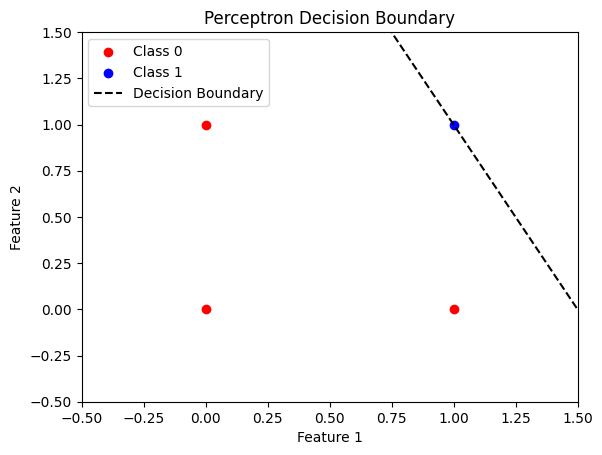

In [91]:
plot_boundary_line(X, y_AND, p2)

In [92]:
p2 = Perceptron(n_iterations=100, learning_rate=0.01)
p2.fit(X, y_XOR)
preds2 = p2.predict(X)

In [93]:
print("Accuracy", np.mean(preds2==y_XOR))

Accuracy 0.5


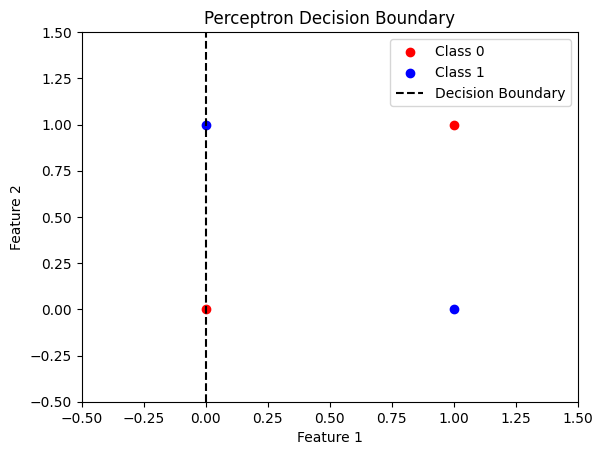

In [94]:
plot_boundary_line(X, y_XOR, p2)

It does correct predictions for the AND but not the XOR.

## Task 8.2: Multi-Layer Perceptron (MLP)

* Use the `PyTorch` framework to build a small MLP. **(RESULTS)**
* Train your MLP on the `XOR gate` using `PyTorch`'s `autograd` functionality. Report on the result. Can your model solve the XOR problem? Test it for all 4 input combinations. **(RESULTS)**
* Plot the decision boundary of your trained MLP. **(RESULTS)**

In [95]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.net= nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, output_size), nn.Sigmoid())

    def forward(self, x):
        return self.net(x)

In [96]:
def train(model, X, y, epochs):
  loss= nn.MSELoss()
  optimizer= optim.SGD(model.parameters(), lr=0.1)
  for i in range(epochs):
    optimizer.zero_grad()
    y_pred= model(X)
    l= loss(y_pred, y)
    print("Epoch", i, ", loss:", l.item())
    l.backward()
    optimizer.step()
  return model
def test(model, X):
    model.eval()
    with torch.no_grad():

      return np.where(model(X)>=0.5, 1, 0)

In [97]:
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])

y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])





In [98]:
model = MLP(input_size=2, hidden_size=4, output_size=1)
model = train(model, X, y, 3000)
preds = test(model, X)

print("Accuracy", np.mean(preds.squeeze(1)== y.numpy().flatten()))


Epoch 0 , loss: 0.25819528102874756
Epoch 1 , loss: 0.25775617361068726
Epoch 2 , loss: 0.2573321461677551
Epoch 3 , loss: 0.2569228410720825
Epoch 4 , loss: 0.2565276622772217
Epoch 5 , loss: 0.25614604353904724
Epoch 6 , loss: 0.25577765703201294
Epoch 7 , loss: 0.2554219365119934
Epoch 8 , loss: 0.2550784945487976
Epoch 9 , loss: 0.25474682450294495
Epoch 10 , loss: 0.2544264495372772
Epoch 11 , loss: 0.2541170120239258
Epoch 12 , loss: 0.2538180947303772
Epoch 13 , loss: 0.2535291910171509
Epoch 14 , loss: 0.25324997305870056
Epoch 15 , loss: 0.2529800236225128
Epoch 16 , loss: 0.25271904468536377
Epoch 17 , loss: 0.2524665296077728
Epoch 18 , loss: 0.2522222399711609
Epoch 19 , loss: 0.25198572874069214
Epoch 20 , loss: 0.2517567276954651
Epoch 21 , loss: 0.25153493881225586
Epoch 22 , loss: 0.2513199746608734
Epoch 23 , loss: 0.25111156702041626
Epoch 24 , loss: 0.25090938806533813
Epoch 25 , loss: 0.25071319937705994
Epoch 26 , loss: 0.2505227327346802
Epoch 27 , loss: 0.2503376

In [99]:
def plot_mlp_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    y_plot = y.numpy().flatten()
    plt.scatter(X[y_plot==0, 0], X[y_plot==0, 1], c='red', marker='s', s=100, label='0')
    plt.scatter(X[y_plot==1, 0], X[y_plot==1, 1], c='blue', marker='o', s=100, label='1')
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01));
    grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    classes = test(model, grid_tensor).reshape(xx.shape)
    plt.contourf(xx, yy, classes, alpha=0.3, cmap='RdBu')
    plt.contour(xx, yy, classes, levels=[0.5], colors='black', linewidths=2)
    plt.title("MLP Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()


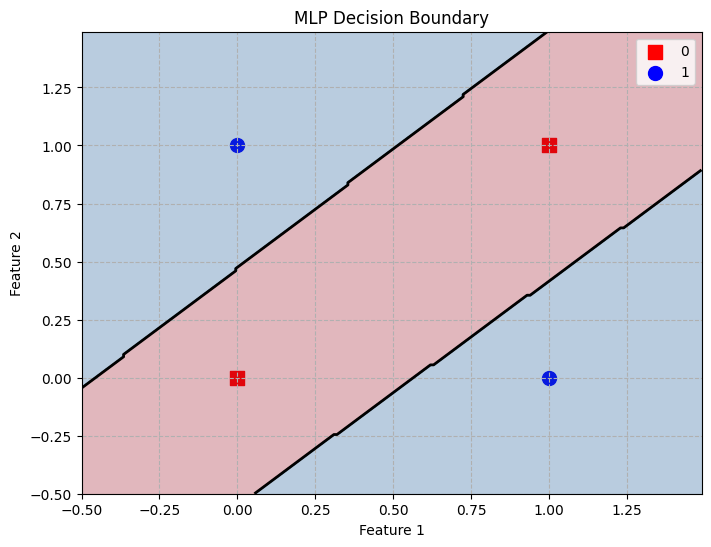

In [100]:
plot_mlp_boundary(X, y, model)

Yes it solved the problem

## Congratz, you made it! :)